# Final Report
<br>
Name: Joe Yu
<br>
Class: CSCI 349 - Intro to Data Mining
<br>
Semester: 2020 Spring
<br>
Instructor: Brian King

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.tree import *
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Introduction

In modern social media, tags and labels are constantly attached to everyone. During my past economic researches, I discovered certain correlations between an individual's job location, total income, age,gender, etc. and the individual's work status (whether the person is self-employed or a wage worker). As an extension off those researches, I am interested in whether an individual can be classified as a wage worker or self-employed based on the above mentioned information.
<br>
The purpose of this project is to be able to classifiy a person into either a wage worker or self-employed category based on various census information including gender, age, education, total income, metropolitan area residence, and population density of the area of residence.
<br>
To do so, the project utilized the American Community Survey sample data as its data source.The American Community Survey sample data (ACS) from IPUMS USA is used in this research, which provides U.S. census data for social, economic, and health research. The American Community Survey (ACS) is an annual survey conducted by the US census bureau. The ACS data contains variables including demography, employment, households and education. The ACS data repondants are randomly selected from the population within a geographic region at a scale of 1-in-100. The sample was collected in 2018 with a sample size of 3,214,539. Given the size of the sample and the reputation of the US census bureau, the ACS data can be viewed as a credible data source for this research.

### Data

In [7]:
#read in the data
df_acs2018 = pd.read_csv("../data/acs_2018_raw.csv")

In [8]:
#Setting categorical data
df_acs2018['METRO'] = pd.Categorical(df_acs2018['METRO'])
df_acs2018['SEX'] = pd.Categorical(df_acs2018['SEX'])
df_acs2018['CLASSWKR'] = pd.Categorical(df_acs2018['CLASSWKR'])

In [9]:
#drop irrelavent varaibles
df_acs2018 = df_acs2018.drop([df_acs2018.columns[0], df_acs2018.columns[7], df_acs2018.columns[9]], axis = 1)

In [10]:
#Tranforming education attainment into years of education
def trans_years(attainment):
    if attainment == 1:
        attainment += 3
    elif attainment >= 1:
        attainment += 6
    else:
        attainment = attainment
    return attainment

#Transform metro status code into actual readable names
def trans_metro(attainment):
    if attainment == 1:
        return 'non_metro'
    elif attainment == 2:
        return 'center_city'
    elif attainment == 3:
        return 'non_center_city'
    else:
        return 'mixed'

#Transform gender codes into strings
def trans_sex(attainment):
    if attainment == 1:
        return 'male'
    elif attainment == 2:
        return 'female'

#Transform work status codes into strings
def trans_work(attainment):
    if attainment == 1:
        return 'self_employed'
    elif attainment == 2:
        return 'wage_worker'

#Transform state codes into state name abbreviations    
def trans_state(attainment):
    if attainment == 1:
        return 'AL'
    elif attainment == 2:
        return 'AK'
    elif attainment == 4:
        return 'AZ'
    elif attainment == 5:
        return 'AR'
    elif attainment == 6:
        return 'CA'
    elif attainment == 8:
        return 'CO'
    elif attainment == 9:
        return 'CT'
    elif attainment == 10:
        return 'DE'
    elif attainment == 11:
        return 'DC'
    elif attainment == 12:
        return 'FL'
    elif attainment == 13:
        return 'GA'
    elif attainment == 15:
        return 'HI'
    elif attainment == 16:
        return 'ID'
    elif attainment == 17:
        return 'IL'
    elif attainment == 18:
        return 'IN'
    elif attainment == 19:
        return 'IA'
    elif attainment == 20:
        return 'KS'
    elif attainment == 21:
        return 'KY'
    elif attainment == 22:
        return 'LA'
    elif attainment == 23:
        return 'ME'
    elif attainment == 24:
        return 'MD'
    elif attainment == 25:
        return 'MA'
    elif attainment == 26:
        return 'MI'
    elif attainment == 27:
        return 'MN'
    elif attainment == 28:
        return 'MS'
    elif attainment == 29:
        return 'MO'
    elif attainment == 30:
        return 'MT'
    elif attainment == 31:
        return 'NE'
    elif attainment == 32:
        return 'NV'
    elif attainment == 33:
        return 'NH'
    elif attainment == 34:
        return 'NJ'
    elif attainment == 35:
        return 'NM'
    elif attainment == 36:
        return 'NY'
    elif attainment == 37:
        return 'NC'
    elif attainment == 38:
        return 'ND'
    elif attainment == 39:
        return 'OH'
    elif attainment == 40:
        return 'OK'
    elif attainment == 41:
        return 'OR'
    elif attainment == 42:
        return 'PA'
    elif attainment == 44:
        return 'RI'
    elif attainment == 45:
        return 'SC'
    elif attainment == 46:
        return 'SD'
    elif attainment == 47:
        return 'TN'
    elif attainment == 48:
        return 'TX'
    elif attainment == 49:
        return 'UT'
    elif attainment == 50:
        return 'VT'
    elif attainment == 51:
        return 'VA'
    elif attainment == 53:
        return 'WA'
    elif attainment == 54:
        return 'WV'
    elif attainment == 55:
        return 'WI'
    elif attainment == 56:
        return 'WY'

In [11]:
#Drop missing CLASSWKR
df_acs2018 = df_acs2018[df_acs2018.CLASSWKR != 0]

In [12]:
#Drop missing METRO
df_acs2018 = df_acs2018[df_acs2018.METRO != 0]

In [13]:
#Drop areas other than the 51 states/regions
df_acs2018 = df_acs2018[df_acs2018.STATEFIP <= 56]

In [14]:
df_acs2018["EDUC_YEARS"] = df_acs2018["EDUC"].apply(lambda x: trans_years(x))

In [15]:
df_acs2018['STATEFIP'] = pd.Categorical(df_acs2018['STATEFIP'])
df_acs2018["METRO_STATUS"] = df_acs2018["METRO"].apply(lambda x: trans_metro(x))
df_acs2018["Gender"] = df_acs2018["SEX"].apply(lambda x: trans_sex(x))
df_acs2018["Class_worker"] = df_acs2018["CLASSWKR"].apply(lambda x: trans_work(x))
df_acs2018["State"] = df_acs2018["STATEFIP"].apply(lambda x: trans_state(x))

In [16]:
#Drop the original codes
df_acs2018 = df_acs2018.drop([df_acs2018.columns[0], df_acs2018.columns[2], df_acs2018.columns[3], df_acs2018.columns[5], df_acs2018.columns[6]], axis = 1)

In [17]:
#Set the new categorical data
df_acs2018['METRO_STATUS'] = pd.Categorical(df_acs2018['METRO_STATUS'])
df_acs2018['Gender'] = pd.Categorical(df_acs2018['Gender'])
df_acs2018['Class_worker'] = pd.Categorical(df_acs2018['Class_worker'])
df_acs2018['State'] = pd.Categorical(df_acs2018['State'])

In [18]:
df_acs2018.head()

,DENSITY,AGE,INCTOT,EDUC_YEARS,METRO_STATUS,Gender,Class_worker,State
0,1889.1,19,-1500,12,mixed,female,wage_worker,AL
1,531.5,18,1600,12,mixed,female,wage_worker,AL
2,2090.1,53,10000,12,mixed,male,wage_worker,AL
4,2341.6,25,0,9,mixed,female,wage_worker,AL
7,304.0,38,0,9,mixed,male,wage_worker,AL


### Data Visualization

In [19]:
#Split the dataset between wage workers and self-employed
df_wage_wkr = df_acs2018[df_acs2018.Class_worker == 'wage_worker']
df_self_employ = df_acs2018[df_acs2018.Class_worker == 'self_employed']

Text(0.5, 1.0, 'income distribution between class workers')

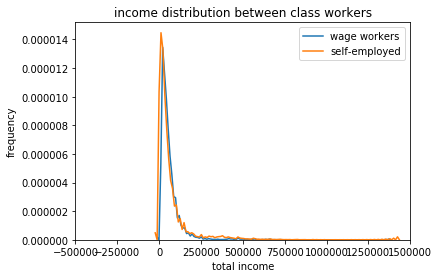

In [20]:
sns.distplot(df_wage_wkr.INCTOT, hist = False, label = 'wage workers')
sns.distplot(df_self_employ.INCTOT, hist = False, label = 'self-employed')
plt.xlim(-500000, 1500000)
plt.xlabel('total income')
plt.ylabel('frequency')
plt.title('income distribution between class workers')

Text(0.5, 1.0, 'income distribution between class workers')

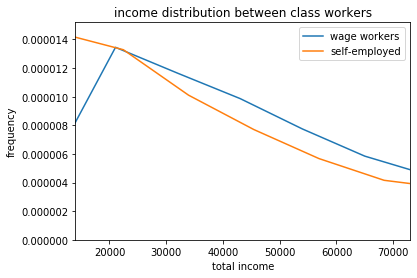

In [21]:
#Show income distribution base on the 25% - 75% range
sns.distplot(df_wage_wkr.INCTOT, hist = False, label = 'wage workers')
sns.distplot(df_self_employ.INCTOT, hist = False, label = 'self-employed')
plt.xlim(14000, 73000)
plt.xlabel('total income')
plt.ylabel('frequency')
plt.title('income distribution between class workers')

From the density plot we can see that the income distribution between wage workers and self-employed people are very similar, with self-employed group having slightly more people having extremely high income. Wage worker seem to be less on both the lower and higher end.

Text(0.5, 1.0, 'relationship between total income and population density')

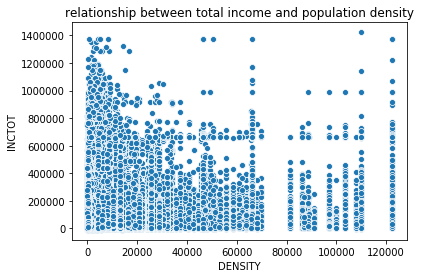

In [22]:
sns.scatterplot(x = 'DENSITY', y = 'INCTOT', data = df_acs2018)
plt.title('relationship between total income and population density')

It is interesting to see the relation between total income and population density forms a U-shape, where the total income would dip at around 60000 person/square mile. This is probably due to the fact the population density of 60000 people/square mile falls into the range for the city centers of mid-sized cities, where population tend to be impoverished.

Text(0.5, 1.0, 'Average income across the states')

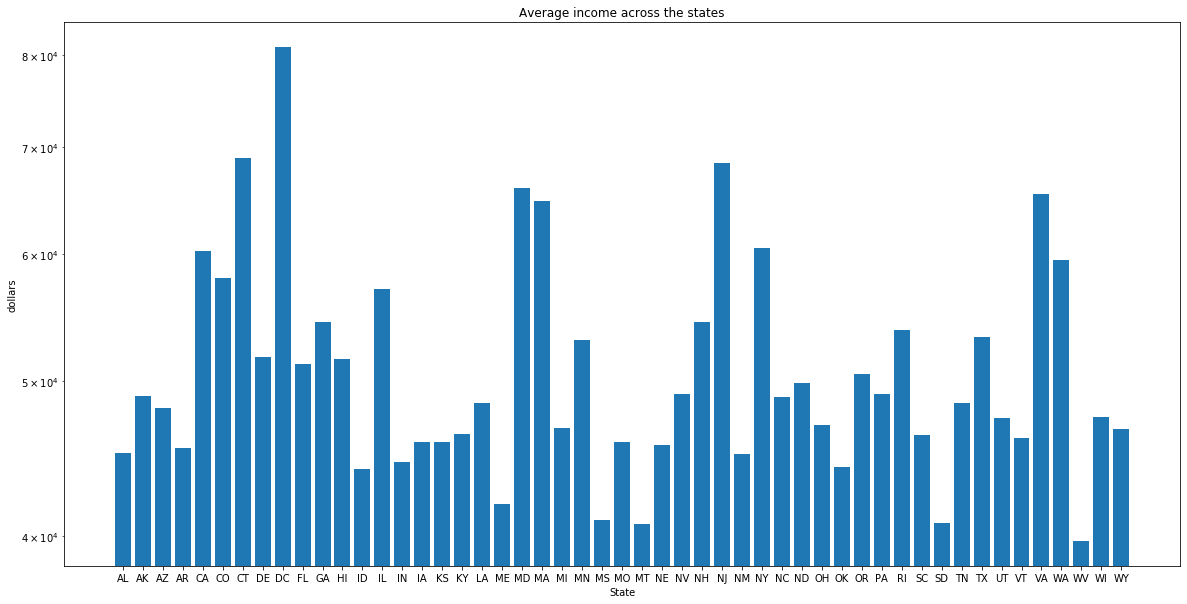

In [23]:
plt.figure(figsize = (20,10))
plt.bar(df_acs2018.groupby('State').INCTOT.mean().index, df_acs2018.groupby('State').INCTOT.mean().values, log = True)
plt.xlabel('State')
plt.ylabel('dollars')
plt.title('Average income across the states')

Text(0.5, 1.0, 'Average education across the states')

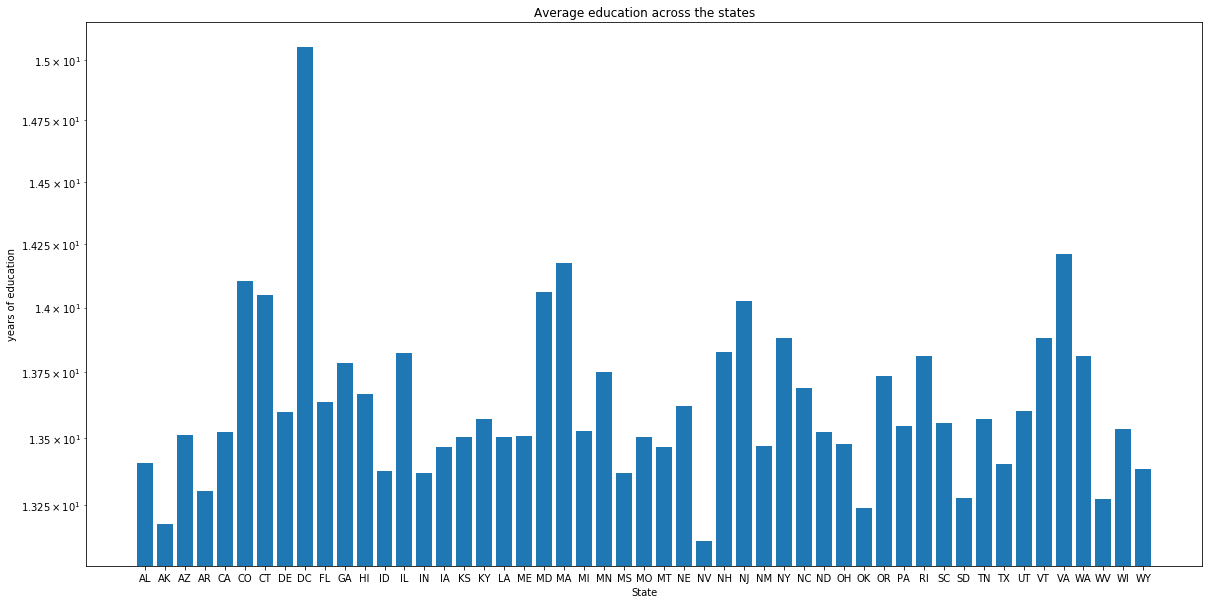

In [50]:
plt.figure(figsize = (20,10))
plt.bar(df_acs2018.groupby('State').EDUC_YEARS.mean().index, df_acs2018.groupby('State').EDUC_YEARS.mean().values, log = True)
plt.xlabel('State')
plt.ylabel('years of education')
plt.title('Average education across the states')

Text(0.5, 1.0, 'Average age across the states')

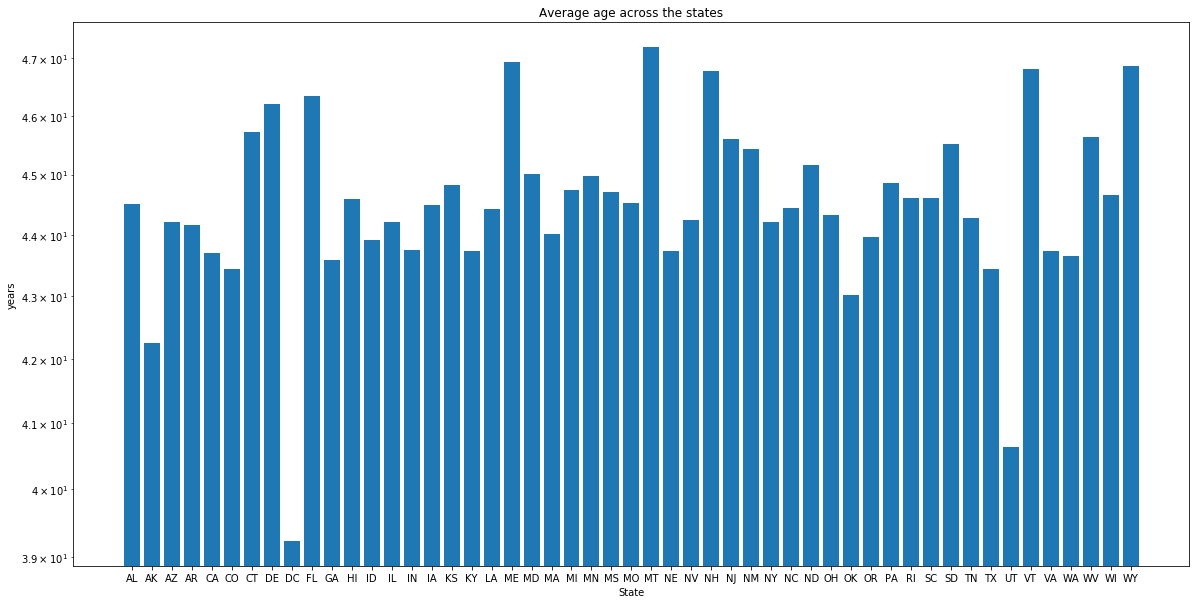

In [25]:
plt.figure(figsize = (20,10))
plt.bar(df_acs2018.groupby('State').AGE.mean().index, df_acs2018.groupby('State').AGE.mean().values, log = True)
plt.xlabel('State')
plt.ylabel('years')
plt.title('Average age across the states')

We can observe that states with higher average years of eduation also tend to have higher average total personal income, while it also appears that being younger on average is also positively correlated to higher education and higher income.

### Model

The project uses the random forest classifier majorly due to the relatively low runtime compared to other methods like SVM, and relatively higher accuracy compared to a single decision tree classifier.
<br>
The hyperparameters were chosen by doing a grid search, where 486 different combinations of criterion, max depth, max features, min samples split, number of estimators, and min sample leaves were tested on 10000 samples randomly selected from the dataset. The search was evaluated using roc_auc, since this is a binary classification. The optimum hyperparameters are shown as follows:
<br>
{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 50}

In [26]:
# Defining the target and input variables
Y = pd.DataFrame(df_acs2018.Class_worker)
X = df_acs2018.drop(columns = ['Class_worker', 'State'])

In [28]:
#Shuffle X and Y
X = shuffle(X, random_state = 0)
Y = shuffle(Y, random_state = 0)

In [29]:
#Turn categorical varaibles in X into binary
X_bin = pd.get_dummies(X)

In [30]:
#splitting X and Y into testing and training sets using 30-70 partition
X_bin_train, X_bin_test, Y_train, Y_test = train_test_split(X_bin, Y, random_state = 0, test_size = 0.3, train_size = 0.7, shuffle = True)

In [31]:
#initializing the random forest classifier using the best hyperparameters
clf = RandomForestClassifier(n_estimators = 50, 
                            criterion = 'entropy', 
                            max_depth = 10, 
                            max_features = 3,
                            min_samples_leaf = 4, 
                            min_samples_split = 8,
                            bootstrap = True)

In [32]:
cv_predict = cross_val_predict(clf, X_bin, y = Y.values.ravel(), cv = 10, n_jobs = 8)
print(classification_report(Y, cv_predict, output_dict = False, digits = 3))

               precision    recall  f1-score   support

self_employed      0.824     0.008     0.017    170403
  wage_worker      0.896     1.000     0.945   1460032

     accuracy                          0.896   1630435
    macro avg      0.860     0.504     0.481   1630435
 weighted avg      0.889     0.896     0.848   1630435



In [33]:
clf.fit(X_bin_train, Y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

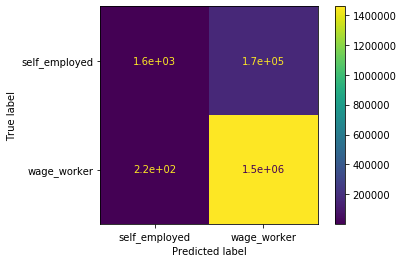

In [47]:
plot_confusion_matrix(clf, X_bin, Y)

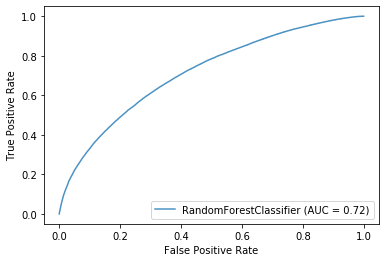

In [51]:
#plot ROC curve
rfc_disp = plot_roc_curve(clf, X_bin_test, Y_test,alpha=0.8)
plt.show()

### Discussion

In [46]:
#show importance of each feature
df_importance = pd.DataFrame(clf.feature_importances_, columns = ['importance'], index = X_bin.columns)
df_importance.sort_values(by = 'importance', ascending = False)

,importance
AGE,0.543187
INCTOT,0.282760
Gender_female,0.048551
EDUC_YEARS,0.046117
DENSITY,0.036193
Gender_male,0.033460
METRO_STATUS_non_metro,0.003363
METRO_STATUS_non_center_city,0.002840
METRO_STATUS_mixed,0.002091
METRO_STATUS_center_city,0.001439


From the table we can observe that age and total income appear to be the two most important features in the classification model, while density and metropolitan status seem to be the least important. However, work status and total income do differ a lot across different states. This results suggests that factors other than city size and population might be affecting the target variable.

Another major difficulty when dealing with the dataset was the states, since the state variable is a categorical variable with 51 values, binarizing them and fitting them into the model can be difficult. In addition, since some states did not have enough data (less than 0.5% of the dataset), I eventaully decided to not use state as a variable in the classification.